# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 9304 Цаплин Илья и Силкин Владислав. Вариант №11

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов. 

## Основные теоретические положения

### Приближение прямой
Допустим что имеется M точек массива данных ($t_m, x_m$), m=1, 2, ..., M, и нужно аппроксимировать данные по данному критерию полиномом x=x(t) степени N. Тогда при аппроксимации 5-ю точками в случае $t_m = m$, m = -2, -1, 0, 1, 2, вычислим x=A+Bt методом наименьших квадратов. Минимизируем функцию:
$$F(A, B) = \sum^2_{m=-2}[x_m - (A+Bm)]^2$$
Продифференцируем выражение, получим систему для $\sum t_m=0$ и $\sum t_m=10$:
$$\begin{cases}
    5A + 0B = \sum^2_{m=-2}x_m, \\
    0A + 10B = \sum^2_{m=-2}mx_m.
    \end{cases}$$
Вычисляя А, мы получаем 1/5 суммы данных, т.е. сглаженное значение равно среднему:
$$\bar{x_n} = \frac{1}{5} \sum^2_{m=-2}x_{n-m}$$
Тогда функция сглаживания при входной функции $e^{i\omega t}$:
$$H(\omega) = \frac{1}{5}[e^{-2i\omega} + e^{-i\omega} + 1 + e^{i\omega} + e^{2i\omega}].$$
Похожим образом можно аппроксимировать для 3, 7, 9 точек

### Приближение параболой второй степени

$$x(t)=A+Bt+Ct^2$$
Продифференцируем $F(A, B, C)$:
$$\begin{cases}
    A\{1\} + B\{m\} + C\{m^2\} = \{x\}, \\
    A\{m\} + B\{m^2\} + C\{m^3\} = \{mx\}, \\
    A\{m^2\} + B\{m^3\} + C\{m^4\} = \{m^2x\}, \\
    \end{cases}$$
  
где {} означает сумму значений аргумента внутри скобок. При выборе ряда -m, -(m-1), ..., m, получим уравнение для A:  
  
$$A=\frac{[\{m^4\}\{x\}-\{m^2\}\{m^2x\}]}{[\{1\}\{m^4\}-\{m^2\}^2]}.$$

### Приближение параболой четвёртой степени:
$$x(t) = A + Bt + Ct^2 + Dt^3 + Et^4$$
Используя точки $-m, -(m+1), ..., m-1, m$, фиксируется система координат. Получаются разности между исходными данными и вычисляемыми значениями, результаты возводятся в квадрат и суммируются. Необходимо минимизировать полученную функцию. Минимизация осуществляется при помощи дифференцирования и приравнивания к нулю соотсветствующих производных  
В результате имеем следующую систему уравнений:
$$
\begin{cases}
A\{1\} + B\{m\} + C\{m^2\} + D\{m^4\} + E\{m^4\} = \{x_{m}\} \\
A\{m\} + B\{m^2\} + C\{m^3\} + D\{m^4\} + E\{m^5\} = \{x_{m} \cdot m\} \\
A\{m^2\} + B\{m^3\} + C\{m^4\} + D\{m^5\} + E\{m^6\} = \{x_{m} \cdot m^2\} \\
A\{m^3\} + B\{m^4\} + C\{m^5\} + D\{m^6\} + E\{m^7\} = \{x_{m} \cdot m^3\} \\
A\{m^4\} + B\{m^5\} + C\{m^6\} + D\{m^7\} + E\{m^8\} = \{x_{m} \cdot m^4\} \\
A\{m^5\} + B\{m^6\} + C\{m^7\} + D\{m^8\} + E\{m^9\} = \{x_{m} \cdot m^5\} \\
\end{cases}.
\\
$$
### Формулы Спенсера
15-точечная формула:
$$x_n = \frac{1}{320}[-3x_{n-7} - 6x_{n-6} - 5x_{n-5} + 3x_{n-4} + 21x_{n-3} + 46x_{n-2} + 67x_{n-1} + 74x_{n} + 67x_{n+1} + 46x_{n+2} + 21x_{n+3} + 3x_{n+4} - 5x_{n+6} - 6x_{n+6} - 3x_{n+7}]$$
21-точечная формула:
$$x_n = \frac{1}{350}[-x_{n-10} - 3x_{n-9} - 5x_{n-8} - 5x_{n-7} - 2x_{n-6} + 6x_{n-5} + 18x_{n-4} + 33x_{n-3} + 47x_{n-2} + 57x_{n-1} + 60x_{n} + 57x_{n-1} + ... ]$$

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов. 

## Выполнение работы

1. Выведем формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам.

In [145]:
import numpy as np
from matplotlib import pyplot as plt


# Функция отрисовки
def plot_func(func, n_range, plot_log=False):
    frequencies = np.arange(0, 0.501, 0.001)
    for n in n_range:
        values = [func(n, f * 2 * np.pi) for f in frequencies]
        
        # Логарифмическая шкала
        if plot_log == True:
            values = [value if value != 0 else 10 ** -200 for value in values]
            values = 20 * np.log10(np.abs(values))
            plt.yticks(np.arange(-100, 1, 20))
            if min(values) < -100:
                plt.ylim(-101, 1)
            plt.ylabel("H(f), Дб")
        else:
            plt.ylabel("H(f)")
        plt.xlabel("f")
        plt.plot(frequencies, values, label=f"n={n}")
    plt.xlim(0, 0.5)
    plt.grid()
    plt.legend()
    plt.show()

# Входной сигнал
def f(t, omega):
    return np.exp(1j * omega * t)

# Передаточная функция H для сглаживания прямой линией
def H(n, omega):
    range_m = list(range(-int(np.floor(n/2)), int(np.floor(n/2))+1))
    return np.real(np.average([f(m, omega) for m in range_m]))


Построим графики $\tilde{H}(f)$

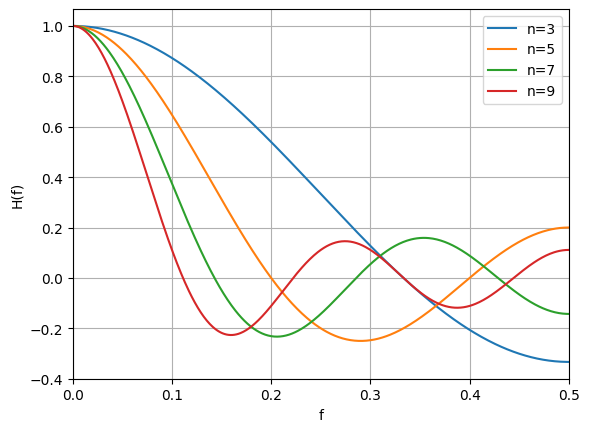

In [147]:
plot_func(H, range(3, 10, 2))

Из графика видно, что:  
1\) Передаточные функции для большего количество точек обладают большей частотой колебаний  
2\) Передаточные функции для большего количество точек быстрее уменьшаются в амплитуде с увеличением частоты сигнала

2. Выведем формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам

In [158]:
# Передаточная функция H для сглаживания полиномом второй степени
def H_2(n, omega):
    range_m = list(range(-int(np.floor(n/2)), int(np.floor(n/2))+1))
    def adder(power):
        adder = 0
        for m in range_m:
            adder += m**power
        return adder
    
    arr = []
    m_4 = adder(4)
    m_2 = adder(2)
    x = sum([f(m, omega) for m in range_m])
    m_2_x =  sum([f(m, omega) * m ** 2 for m in range_m])
    return np.real((m_4 * x - m_2 * m_2_x) / (n * m_4 - m_2 ** 2))

Построим графики $\tilde{H}(f)$

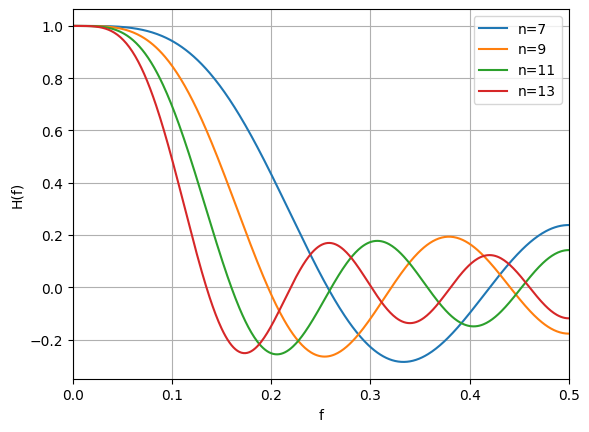

In [155]:
plot_func(H_2, range(7, 14, 2))

Из графика видно, что:  
1\) Передаточные функции для большего количество точек обладают большей частотой колебаний  
2\) Передаточные функции для большего количество точек быстрее уменьшаются в амплитуде с увеличением частоты сигнала  
3\) Окно частот, для которых почти не происходит приглушения, шире, чем при сглаживании прямой линией   

3. Выведем формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам.  
Необходимо найти только А из системы уравнений. Из-за выбора точек необходимы только уравнения 1,3,5, которые значительно упрощаются:
$$
\left\{\begin{split}
A\{1\} + C\{m^2\} + E\{m^4\} = \{x_{m}\} \\
A\{m^2\} + C\{m^4\} + E\{m^6\} = \{x_{m} \cdot m^2\} \\
A\{m^4\} + C\{m^6\} + E\{m^8\} = \{x_{m} \cdot m^4\} \\
\end{split}\right.
\\
$$

Решая систему уравнений, находим А и получаем передаточную функцию

In [2]:
def H_4(n, omega):
    m = range_m = list(range(-int(np.floor(n/2)), int(np.floor(n/2))+1))
    
    # Составление системы
    A = np.zeros((3, 3))
    B = []
    for i in range(3):
        for j in range(3):
            A[i][j] = sum([1 * m_element ** (i * 2) * m_element ** (j * 2) for m_element in m])
        B.append(sum([f(m_element, omega) * m_element ** (i*2) for m_element in m]))
        
    # Численное решение системы
    solution = np.linalg.solve(A, B)
    return np.real(solution[0])

Построим графики $\tilde{H}(f)$

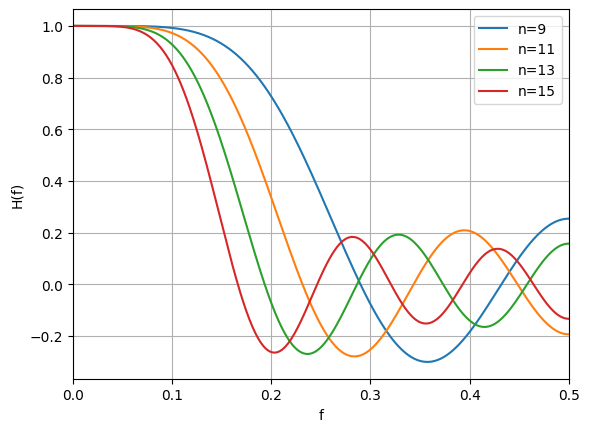

In [171]:
plot_func(H_4, range(9, 16, 2))

Из графика видно, что:  
1\) Передаточные функции для большего количество точек обладают большей частотой колебаний  
2\) Передаточные функции для большего количество точек быстрее уменьшаются в амплитуде с увеличением частоты сигнала  
3\) Окно частот, для которых почти не происходит приглушения, шире, чем при использовании фильтра, соответствующего сглаживанию полиномом второго порядка  

4. Выведем формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. 

In [176]:
# Spencer
# Коэффциенты
S_15 = [-3, -6, -5, 3, 21, 46, 67, 74]
S_15 = S_15 + S_15[-2::-1]
S_15 = [i / 320 for i in S_15]

S_21 = [-1, -3, -5, -5, -2, 6, 18, 33, 47, 57, 60]
S_21 = S_21 + S_21[-2::-1]
S_21 = [i / 350 for i in S_21]

def spencer_15(omega):
    result = 0
    range_m = list(range(-int(np.floor(15/2)), int(np.floor(15/2))+1))
    for s, m in zip(S_15, range_m):
        result += s * f(m, omega)
    return np.real(result)

def spencer_21(omega):
    result = 0
    range_m = list(range(-int(np.floor(21/2)), int(np.floor(21/2))+1))
    for s, m in zip(S_21, range_m):
        result += s * f(m, omega)
    return np.real(result)

def spencer(n, omega):
    if n == 15:
        return spencer_15(omega)
    if n == 21:
        return spencer_21(omega)
    return 0

Построим графики $\tilde{H}(f)$

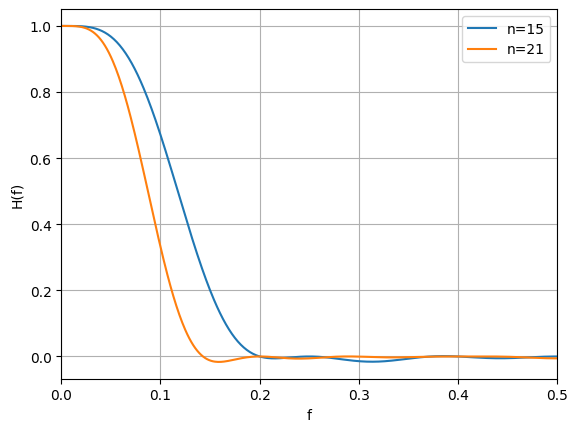

In [178]:
plot_func(spencer, [15, 21])

Из графика видно, что:  
1\) Передаточная функция для 21-точечной формулы обладает большей частотой колебаний  
2\) Передаточная функция для 21-точечной формулы быстрее уменьшаются в амплитуде с увеличением частоты сигнала  
3\) По сравнению с передаточными функциями из п.1-п.3 уменьшение амплитуды происходит гораздо быстрее при превышении оптимальной частоты

5. Построим графики из предыдущих пунктов в логарифмической шкале (Дб).

Фильтр, соответствующий сглаживанию прямой линией 

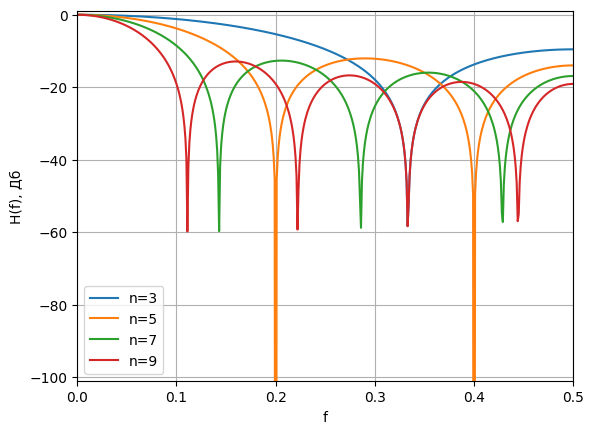

In [188]:
plot_func(H, range(3, 10, 2), plot_log=True)

Фильтр, соответствующий сглаживанию полиномом второй степени

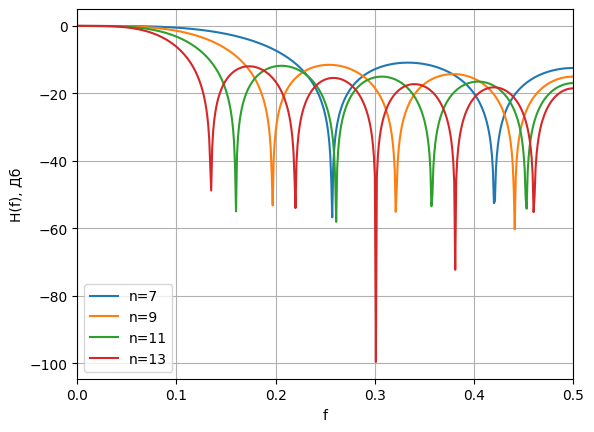

In [189]:
plot_func(H_2, range(7, 14, 2), plot_log=True)

Фильтр, соответствующий сглаживанию полиномом четвертой степени 

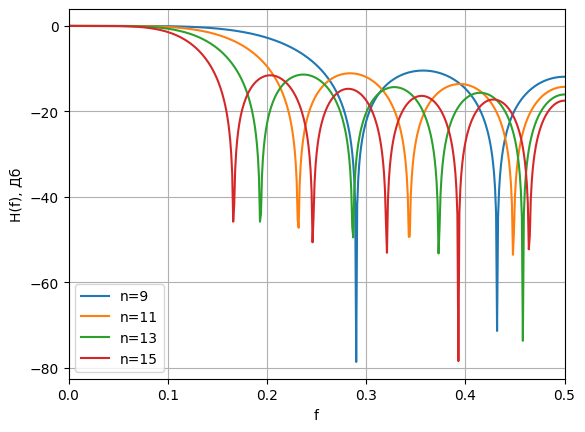

In [190]:
plot_func(H_4, range(9, 16, 2), plot_log=True)

Фильтр, соответствующий сглаживанию по формулам Спенсера

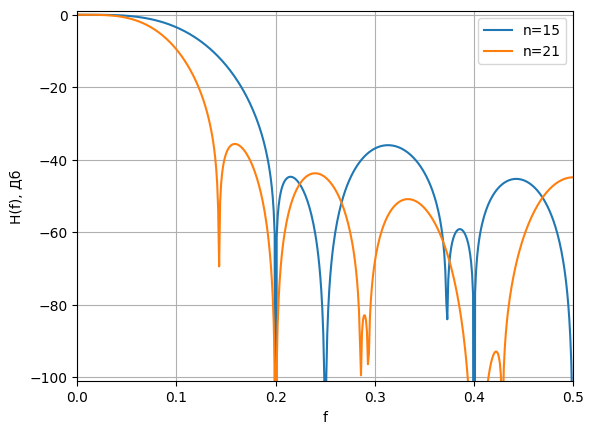

In [191]:
plot_func(spencer, [15, 21], plot_log=True)

Значения передаточных функций были переведены в децибелы.
Формула перевода в децибелы:  
$$20lg(H(f))$$
Таким образом, падение на 20 единиц по оси Y означает уменьшение выходного сигнала в 10 раз по сравнению с входным

6. В ходе сравнительного анализа смоделированных фильтров было установлено:  
1\)  Увеличение степени полинома, который используется для сглаживания, приводит к увеличению размера окна низких частот, для которых почти не происходит приглушения входного сигнала  
2\) Увеличение количества используемых точек приводит к тому, что кривые передаточных функций спадают более резко  
3\) При использовании фильтра, соответствующего сглаживанию по формулам Спенсера, уменьшение амплитуды происходит гораздо быстрее, чем при использовании других смоделированных фильров


## Выводы

В ходе выполнения лабораторной работы был проведён анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.  
Были смоделированы передаточные функции исследуемых фильтров, построены графики передаточных функций. Проведён сравнительный анализ смоделированных фильтров